In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [6]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [3]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [4]:
diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

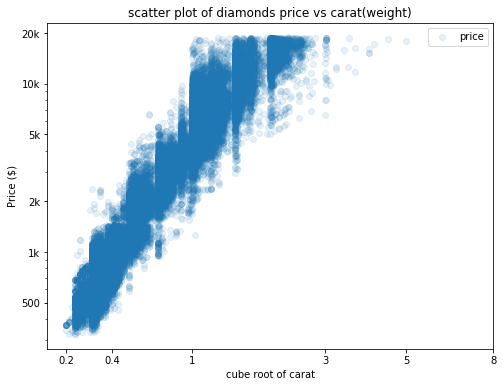

In [12]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 1/10)


plt.xlabel('cube root of carat')
carat_ticks = [0.2, 0.4, 1, 3, 5, 8]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')
plt.title('scatter plot of diamonds price vs carat(weight)')
plt.legend()
plt.show()

Price vs. Carat Polishing comment 1: Use the following list to make sure you've checked the major points of revision in this plot.
- <span style="color:white">Does the plot has an informative title?</span>
- <span style="color:white">Are the axis labels informative?</span>
- <span style="color:white">Are the tick values interpretable?</span>
- <span style="color:white">Do we need to worry about any of the plot aesthetics?</span>

Price vs. Carat Polishing comment 2: Here are some specific comments on the polishing of the plot.

- <span style="color:white">The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.</span>
- <span style="color:white">As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.</span>
- <span style="color:white">There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.</span>

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [18]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]
diamonds_1c

,carat,cut,color,clarity,depth,table,price,x,y,z,cr_carat
215,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94,1.003322
241,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03,1.003322
242,1.01,Premium,H,SI2,62.7,59.0,2788,6.31,6.22,3.93,1.003322
284,1.00,Premium,I,SI2,58.2,60.0,2795,6.61,6.55,3.83,1.000000
298,1.01,Fair,E,SI2,67.4,60.0,2797,6.19,6.05,4.13,1.003322
324,1.00,Premium,J,SI2,62.3,58.0,2801,6.45,6.34,3.98,1.000000
369,1.00,Fair,G,I1,66.4,59.0,2808,6.16,6.09,4.07,1.000000
384,1.00,Fair,J,VS2,65.7,59.0,2811,6.14,6.07,4.01,1.000000
385,0.99,Fair,I,SI2,68.1,56.0,2811,6.21,6.06,4.18,0.996655
423,0.99,Fair,J,SI1,55.0,61.0,2812,6.72,6.67,3.68,0.996655


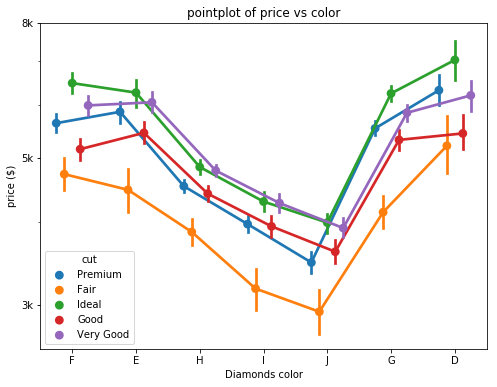

In [24]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut', dodge = 0.5)

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)
plt.title('pointplot of price vs color')
plt.xlabel('Diamonds color')
plt.ylabel('price ($)')

plt.show();

Price vs. Color, Cut: Polishing comment 1: <span style="color:white"> Don't forget to provide an informative title and axis labels.</span>

Price vs. Color, Cut: Polishing comment 2: <span style="color:white"> There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.</span>

> If you want to check your work on the case study against a reference, take a look at the example project in the Resources! The example project is based on the same diamonds dataset, and all of the plots that you've worked on in this lesson are also covered there.